#Sugar Cane - Production

##Problems Statements :-

**Sugarcane Production Analysis**

1. **Sugarcane-Producing Countries by Continent:** How many countries produce sugarcane in each continent?
2. **Top Sugarcane Producer:** Which country has the highest sugarcane production?
3. **Top 10 Countries by Sugarcane Land:** Which 10 countries have the most land dedicated to sugarcane cultivation?
4. **Highest Yielding Country:** Which country produces the most sugarcane per hectare?
5. **Highest Production Per Capita:** Which country has the highest sugarcane production per person?
6. **Land vs. Production:** Do countries with the most sugarcane land necessarily produce the most sugarcane?
7. **Yield vs. Production:** Do countries with higher sugarcane yields per hectare also have higher overall production?
8. **Top Sugarcane-Producing Continent:** Which continent produces the most sugarcane?
9. **Countries vs. Production (Continent):** Does the number of sugarcane-producing countries in a continent correlate with higher production in that continent?
10. **Land vs. Production (Continent):** Does the continent with the most land dedicated to sugarcane cultivation produce the most sugarcane?
11. **Production Distribution by Continent:** How is sugarcane production distributed across the continents?

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/sakshisinghal936/EDA-Sugarcane-/main/List%20of%20Countries%20by%20Sugarcane%20Production.csv')

In [4]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Unnamed: 0                  103 non-null    int64 
 1   Country                     103 non-null    object
 2   Continent                   103 non-null    object
 3   Production (Tons)           103 non-null    object
 4   Production per Person (Kg)  103 non-null    object
 5   Acreage (Hectare)           102 non-null    object
 6   Yield (Kg / Hectare)        102 non-null    object
dtypes: int64(1), object(6)
memory usage: 5.8+ KB


##Data Cleaning

###Removing and Replacing points and commas

In [6]:
#let's remove '.' from production
df['Production (Tons)']=df['Production (Tons)'].str.replace('.','')
df['Production (Tons)'].head()
#Why we replaced with no space because so that we can later convert object -> int/float

0    768678382
1    348448000
2    123059739
3     87468496
4     65450704
Name: Production (Tons), dtype: object

In [7]:
#same is the case with Acreage (Hectare) and others
# df['Production per Person (Kg)']=df['Production per Person (Kg)'].str.replace('.','')
#but also change comma to point for decimal - let's do both of them together
df['Production per Person (Kg)']=df['Production per Person (Kg)'].str.replace('.','').str.replace(',','.')
df['Production per Person (Kg)'].head()

0    3668.531
1      260721
2       88287
3    1264.303
4      324219
Name: Production per Person (Kg), dtype: object

In [8]:
df['Production (Tons)']=df['Production (Tons)'].str.replace('.','')
df['Acreage (Hectare)']=df['Acreage (Hectare)'].str.replace('.','')
df['Yield (Kg / Hectare)']=df['Yield (Kg / Hectare)'].str.replace('.','').str.replace(',','.')
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


###Renaming Columns

In [9]:
#let's now rename the columns for easier access
df.rename(columns={'Production (Tons)':'production','Production per Person (Kg)':'production_per_person',
                   'Yield (Kg / Hectare)':'yield','Acreage (Hectare)':'acreage'},inplace=True)
df.head()

,Unnamed: 0,Country,Continent,production,production_per_person,acreage,yield
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


###Removing NULL - should or not

In [10]:
df.isnull().sum()

Unnamed: 0               0
Country                  0
Continent                0
production               0
production_per_person    0
acreage                  1
yield                    1
dtype: int64

In [11]:
df[df['acreage'].isnull()]
#as it is only one row and we have both NaN value , let's instead of filling it remove it

,Unnamed: 0,Country,Continent,production,production_per_person,acreage,yield
99,99,Djibouti,Africa,53,51,NaN,NaN


In [12]:
df=df.dropna().reset_index()
df.isnull().sum()

index                    0
Unnamed: 0               0
Country                  0
Continent                0
production               0
production_per_person    0
acreage                  0
yield                    0
dtype: int64

In [13]:
df.head()

,index,Unnamed: 0,Country,Continent,production,production_per_person,acreage,yield
0,0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [14]:
#now we have to drop both the index column as well as the Unnamed: 0 column
df.drop(['Unnamed: 0','index'],axis=1,inplace=True)
df.head(2)

,Country,Continent,production,production_per_person,acreage,yield
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5


###Convert Dataypes

In [15]:
df.dtypes
#Now let's convert the datatypes

Country                  object
Continent                object
production               object
production_per_person    object
acreage                  object
yield                    object
dtype: object

In [16]:
df[df.columns[2:]]=df[df.columns[2:]].astype('float')

In [17]:
df.dtypes

Country                   object
Continent                 object
production               float64
production_per_person    float64
acreage                  float64
yield                    float64
dtype: object

###Checking Duplicates

In [18]:
df.nunique() #as all are unique no need to del duplicates as they do not exist

Country                  102
Continent                  6
production               102
production_per_person    101
acreage                  101
yield                    102
dtype: int64

##Data Analysis

###Univariate Analysis

How many Country produces SugarCanes Continents wise

In [19]:
df.groupby('Continent')['Country'].count()

Continent
Africa           38
Asia             25
Europe            2
North America    22
Oceania           4
South America    11
Name: Country, dtype: int64

In [20]:
#or i can use
df['Continent'].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

<Axes: xlabel='Continent'>

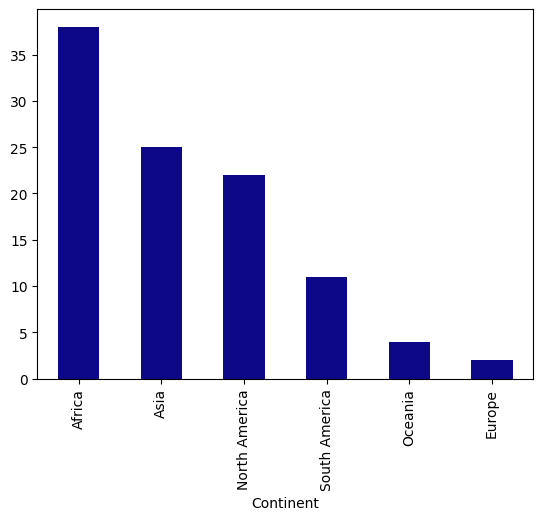

In [21]:
df['Continent'].value_counts().plot(kind='bar',cmap='plasma')

In [22]:
df.columns

Index(['Country', 'Continent', 'production', 'production_per_person',
       'acreage', 'yield'],
      dtype='object')

Analyzing using Graphs

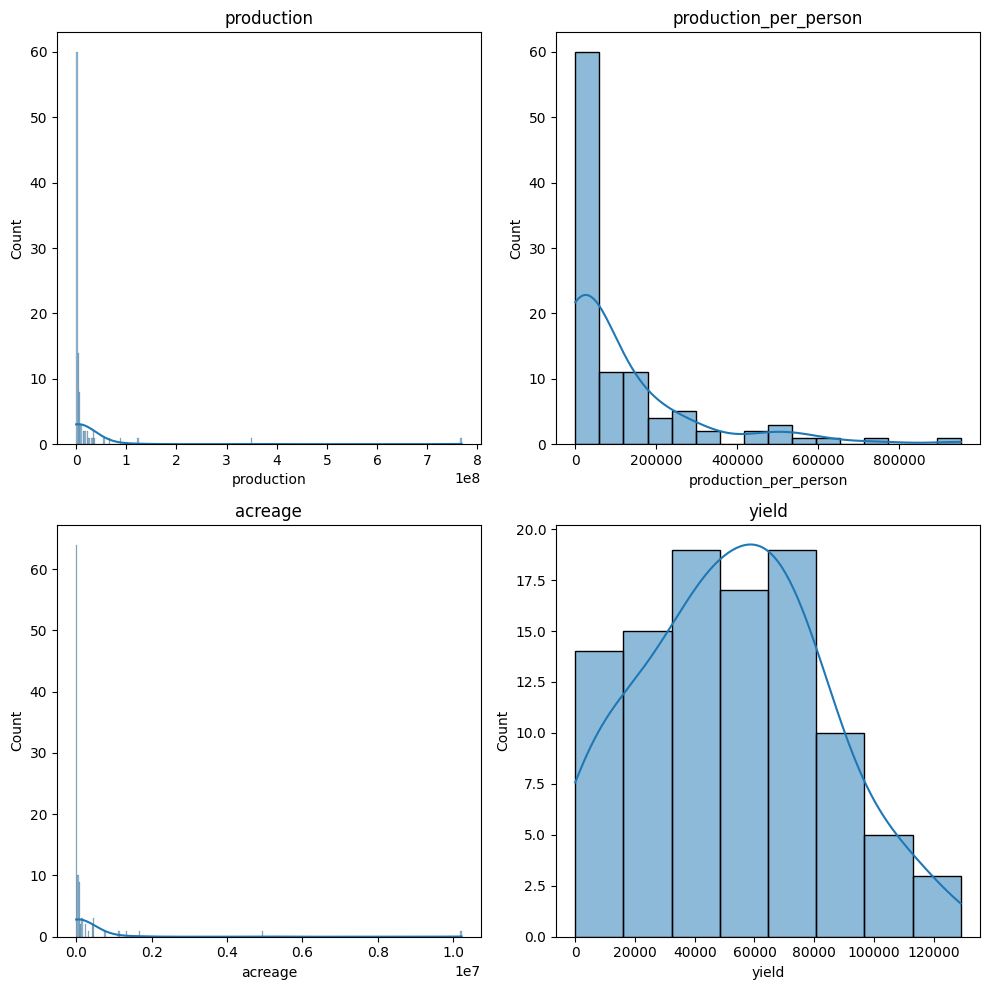

In [23]:
#let's analyze the numerical columns
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
sns.histplot(df['production'],kde=True)
plt.title('production')

plt.subplot(2,2,2)
sns.histplot(df['production_per_person'],kde=True)
plt.title('production_per_person')

plt.subplot(2,2,3)
sns.histplot(df['acreage'],kde=True)
plt.title('acreage')

plt.subplot(2,2,4)
sns.histplot(df['yield'],kde=True)
plt.title('yield')

plt.tight_layout()
#As you can see all are skewed except yield but in this we can't remove the outliers as they carry important information like
# maximum or minimum production country etc.

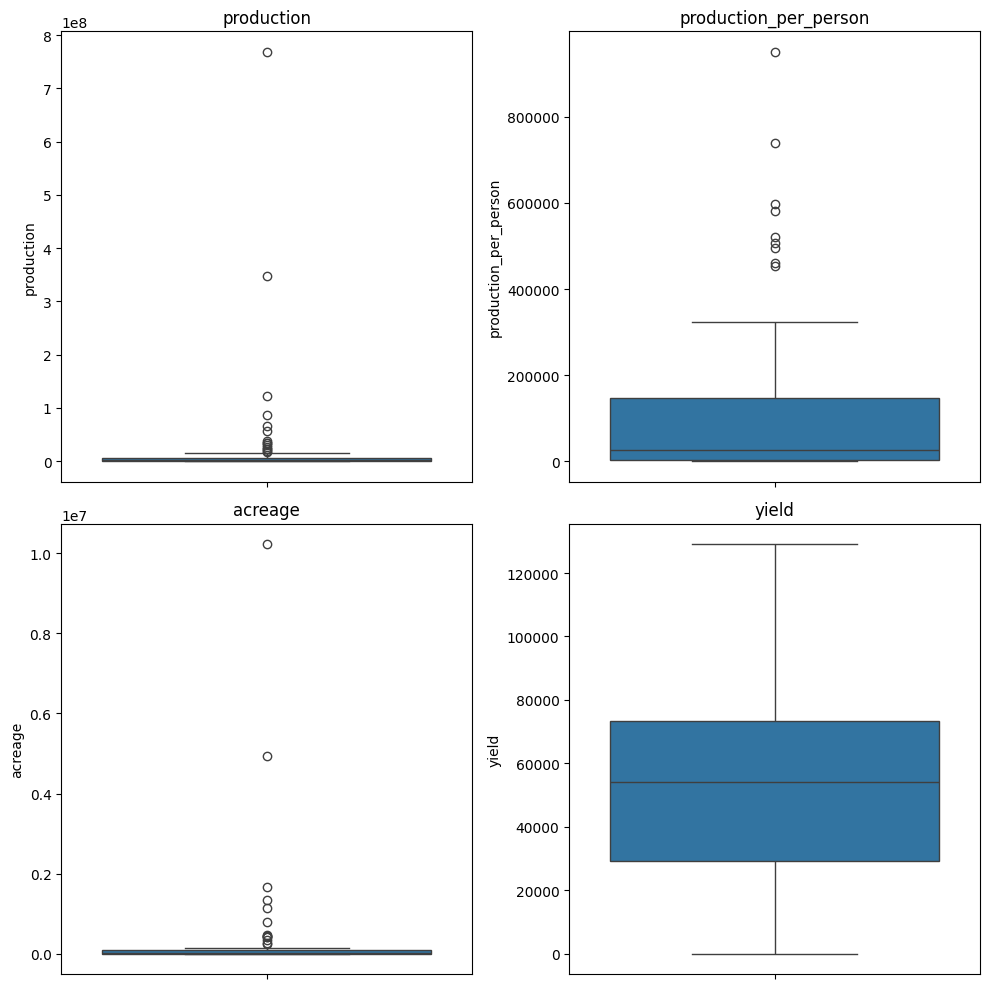

In [24]:
# lets see the outliers -> boxplot
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
sns.boxplot(df['production'])
plt.title('production')

plt.subplot(2,2,2)
sns.boxplot(df['production_per_person'])
plt.title('production_per_person')

plt.subplot(2,2,3)
sns.boxplot(df['acreage'])
plt.title('acreage')

plt.subplot(2,2,4)
sns.boxplot(df['yield'])
plt.title('yield')

plt.tight_layout()

analyze using math

In [25]:
#now let's analyze using math
df.describe()

,production,production_per_person,acreage,yield
count,1.020000e+02,102.000000,1.020000e+02,102.000000
mean,1.850372e+07,112952.435755,2.498981e+05,52628.078431
std,8.419149e+07,176651.341929,1.137003e+06,30504.676683
min,1.000000e+00,0.000000,0.000000e+00,10.000000
25%,6.251875e+04,3671.910000,1.104000e+03,29072.025000
50%,1.440044e+06,25572.500000,1.655800e+04,54108.950000
75%,6.426824e+06,146384.750000,8.047400e+04,73282.700000
max,7.686784e+08,951087.000000,1.022620e+07,129049.300000


###Bivariate Analysis

find country with max. production

In [26]:
df_new=df[['Country','production']]
df_new.head()

,Country,production
0,Brazil,768678382.0
1,India,348448000.0
2,China,123059739.0
3,Thailand,87468496.0
4,Pakistan,65450704.0


In [27]:
#to analyze we need percentage
df_new['production_percentage']=df_new['production']*100/df_new['production'].sum()
df_new.head()

<ipython-input-27-7538918700f9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['production_percentage']=df_new['production']*100/df_new['production'].sum()


,Country,production,production_percentage
0,Brazil,768678382.0,40.727285
1,India,348448000.0,18.462001
2,China,123059739.0,6.520138
3,Thailand,87468496.0,4.634389
4,Pakistan,65450704.0,3.467809


In [28]:
#renaming df_new to df -> it was getting annoying
dfnew=df_new

<Axes: ylabel='production_percentage'>

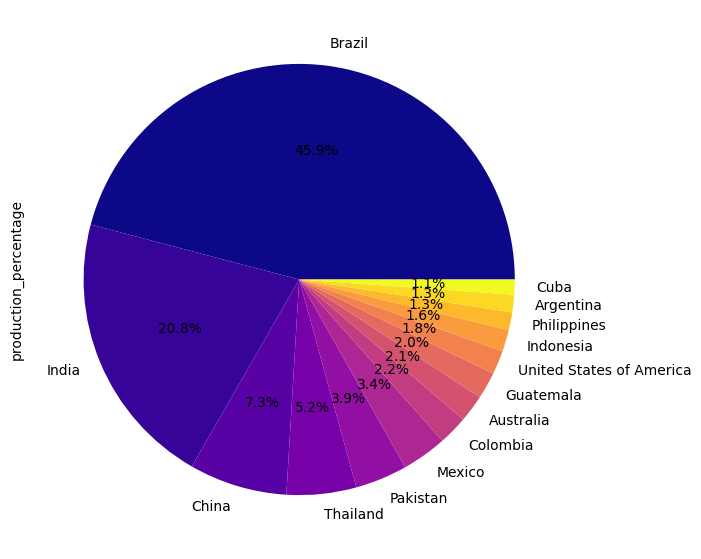

In [29]:
# dfnew[dfnew['production_percentage']>1] -> this was giving the entire dataset instead of just one column -> mistake!!
filtered=dfnew['production_percentage'][dfnew['production_percentage']>1]
cname=dfnew['Country'][dfnew['production_percentage']>1]
len(filtered) #14
filtered.plot(kind='pie',autopct='%1.1f%%',figsize=(7,7),labels=cname,cmap='plasma',)
#This makes us kind of sure that our max. production lies in the top 10 rows only

<Axes: xlabel='Country', ylabel='production_percentage'>

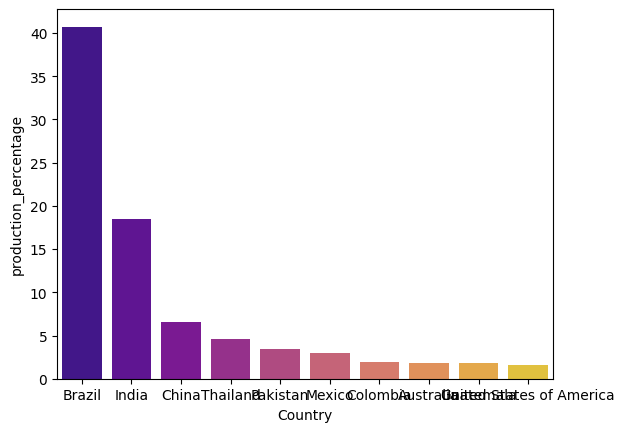

In [30]:
ax=sns.barplot(y='production_percentage',x='Country',hue='Country',data=dfnew.head(10),palette='plasma',legend=False)
#but now as you can see we have overlapping names in the x-axis
ax

<ipython-input-31-710fa6659735>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90) #to resolve the overlapping name problem


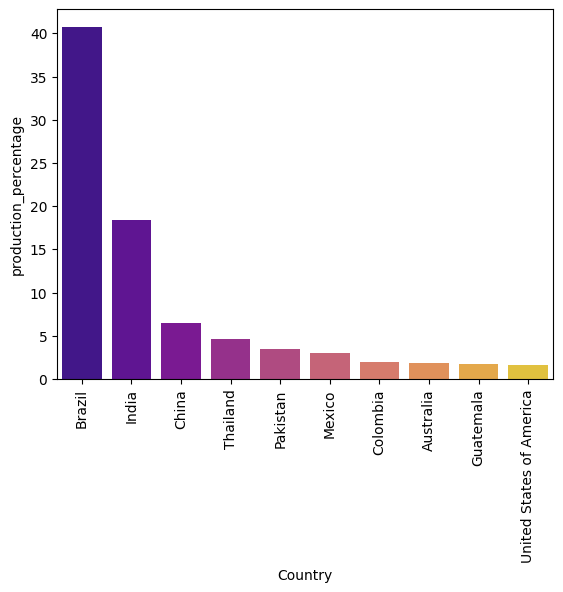

In [31]:
ax=sns.barplot(y='production_percentage',x='Country',hue='Country',data=dfnew.head(10),palette='plasma',legend=False)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90) #to resolve the overlapping name problem
plt.show()

Find top 10 countries with highest land(Acreage)

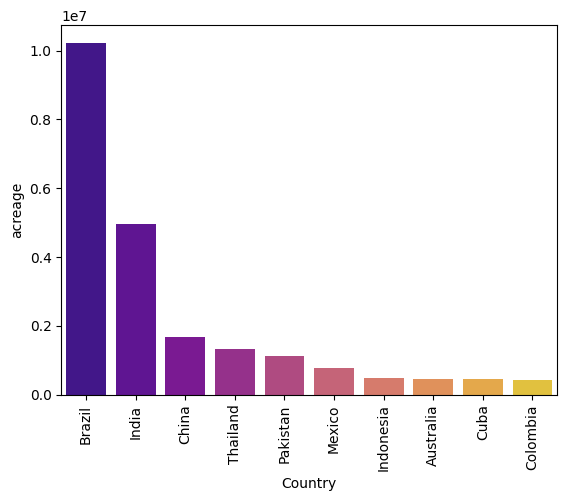

In [32]:
df_acr=df.sort_values('acreage',ascending=False)
sns.barplot(x='Country',y='acreage',hue='Country',data=df_acr.head(10),palette='plasma',legend=False)
plt.xticks(rotation=90)
plt.show()

Which country has highest Yeild per hectare.

In [33]:
df.columns

Index(['Country', 'Continent', 'production', 'production_per_person',
       'acreage', 'yield'],
      dtype='object')

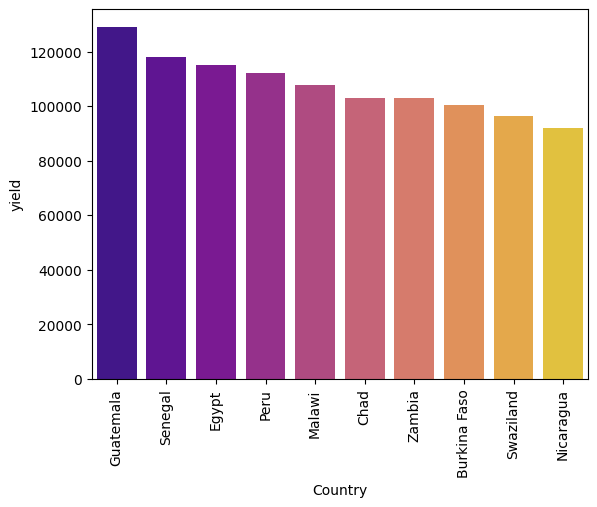

In [34]:
df_yield=df.sort_values('yield',ascending=False)
sns.barplot(x='Country',y='yield',hue='Country',data=df_yield.head(10),palette='plasma',legend=False)
plt.xticks(rotation=90)
plt.show()

So, if i want learn the lesson of scalability i will study the case of brazil but if i want to see the efficiency I will se the case of Guatemala

Which country has the highest production_per_person?

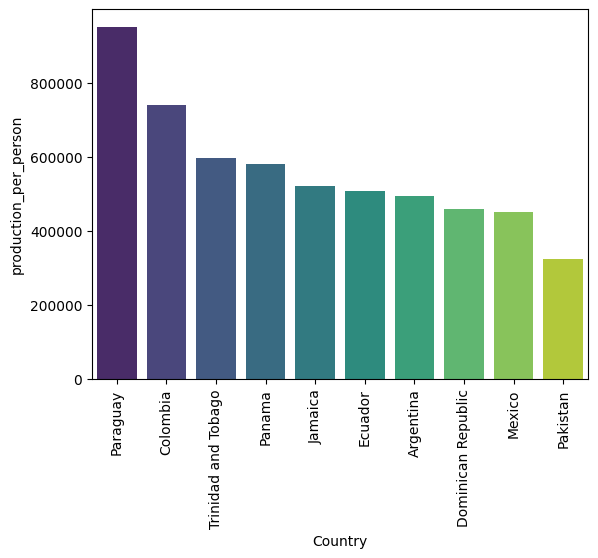

In [35]:
df_ppp=df.sort_values('production_per_person',ascending=False)
sns.barplot(x='Country',y='production_per_person',hue='Country',data=df_ppp.head(10),palette='viridis',legend=False)
plt.xticks(rotation=90)
plt.show()
#Ans-> Paraguay

Correlation

In [36]:
df.corr(numeric_only=True)
#closer to 0 -> Not related
#closer to -1 -> negatively co-related
#closer to 1 -> co-related

,production,production_per_person,acreage,yield
production,1.000000,0.015000,0.997550,0.132812
production_per_person,0.015000,1.000000,0.012557,0.017999
acreage,0.997550,0.012557,1.000000,0.113433
yield,0.132812,0.017999,0.113433,1.000000


<Axes: >

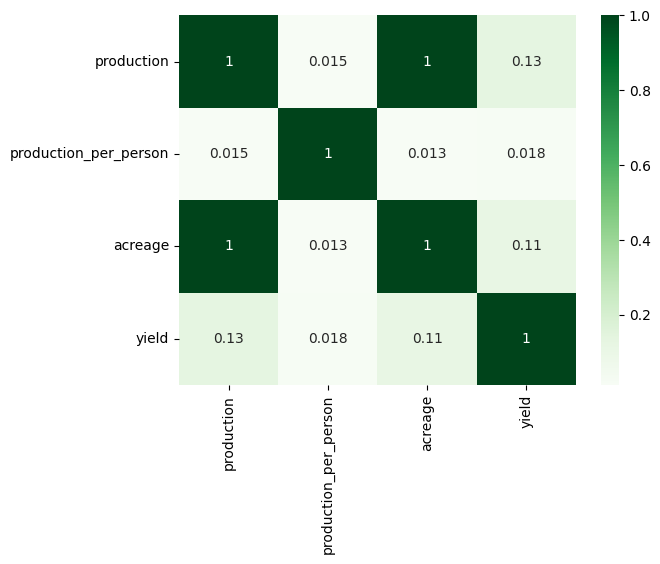

In [37]:
#we can also use heatmaps for correlation
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='Greens')
#as we can see production and acreage are directly correlated ,rest are not

Do countries with highest land produce more sugar cane?

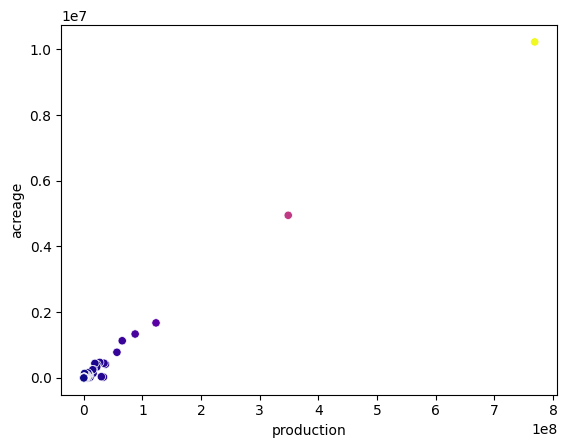

In [38]:
#Yes using correlation but we can also use scatterplot for it
sns.scatterplot(x='production',y='acreage',hue='production',data=df,palette='plasma',legend=False)
plt.show()
#Ans -> Yes

Do Countries which produces/yeild more sugarcane per hectare , produces more sugarcane?

<Axes: xlabel='yield', ylabel='production'>

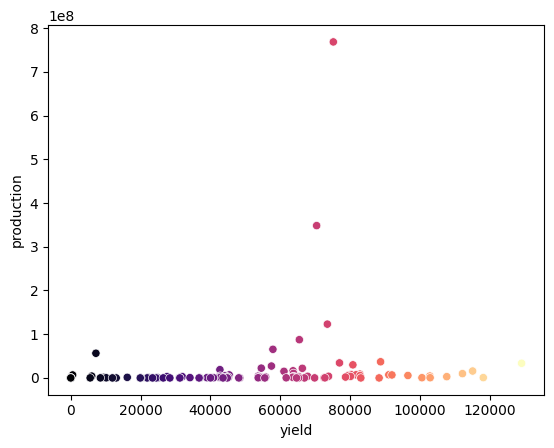

In [39]:
sns.scatterplot(y='production',x='yield',data=df,hue='yield',palette='magma',legend=False)

Analysis for continent

Which continent produces most sugarcane?

In [40]:
df.columns

Index(['Country', 'Continent', 'production', 'production_per_person',
       'acreage', 'yield'],
      dtype='object')

In [41]:
df.sort_values('production',ascending=False).iloc[0]['Continent']

'South America'

In [42]:
#above code but in longer form -> for better understanding
df_continent=df.groupby('Continent').sum()
df_continent

,Country,production,production_per_person,acreage,yield
Continent,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681472.0,2332636.293,1439089.0,2142107.5
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,1857769.303,10608319.0,1171871.4
Europe,PortugalSpain,5823.0,536.000,71.0,131870.9
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,3796081.508,1581983.0,1082602.4
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,28593.605,490909.0,162419.1
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,3505531.738,11369236.0,677192.7


In [43]:
df_continent.sort_values('production',ascending=False)
#Answer is South America

,Country,production,production_per_person,acreage,yield
Continent,,,,,
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,3505531.738,11369236.0,677192.7
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,1857769.303,10608319.0,1171871.4
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,3796081.508,1581983.0,1082602.4
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681472.0,2332636.293,1439089.0,2142107.5
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,28593.605,490909.0,162419.1
Europe,PortugalSpain,5823.0,536.000,71.0,131870.9


In [44]:
df.groupby('Continent')['production'].sum()

Continent
Africa            89681472.0
Asia             721930425.0
Europe                5823.0
North America    173995947.0
Oceania           36177574.0
South America    865588126.0
Name: production, dtype: float64

<Axes: xlabel='Continent'>

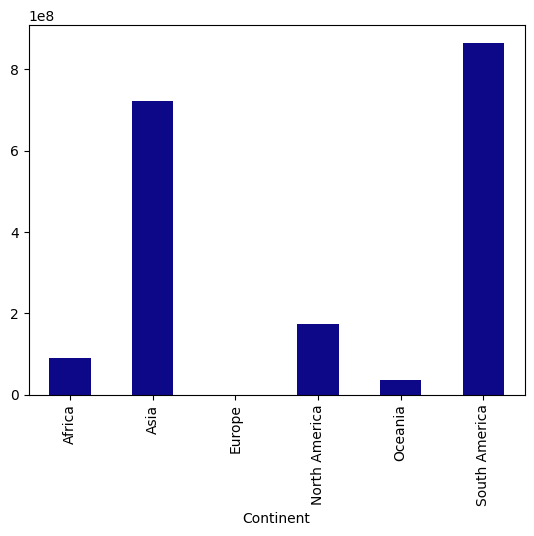

In [45]:
#or using graph
df.groupby('Continent')['production'].sum().plot(kind='bar',cmap='plasma')

Which Continent has highest land for production of Sugarcane?

In [46]:
df.groupby('Continent')['acreage'].sum().sort_values(ascending=False)[0:1]

Continent
South America    11369236.0
Name: acreage, dtype: float64

<Axes: xlabel='Continent'>

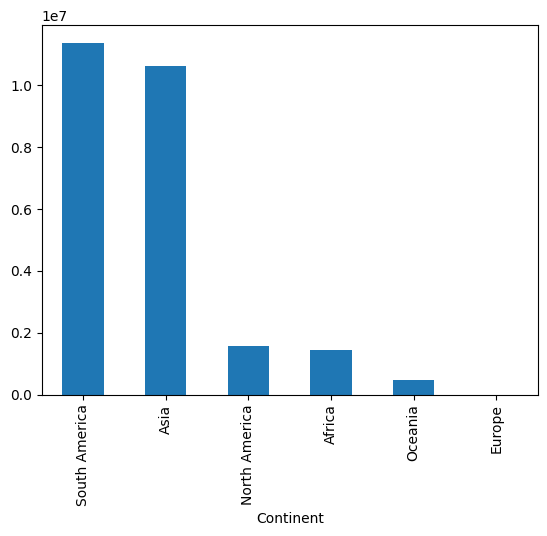

In [47]:
#or we can use the df_continent we made earlier
df_continent['acreage'].sort_values(ascending=False).plot(kind='bar')

Do number of countries in continent affect number of production?

Tip:- Group by is used when you need to split your data into groups based on some criteria, apply a function to each group independently, and then combine the results back into a single DataFrame or Series.

In [48]:
df_continent['number_of_country']=df.groupby(df['Continent']).count()['Country']
df_continent

,Country,production,production_per_person,acreage,yield,number_of_country
Continent,,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681472.0,2332636.293,1439089.0,2142107.5,38
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,1857769.303,10608319.0,1171871.4,25
Europe,PortugalSpain,5823.0,536.000,71.0,131870.9,2
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,3796081.508,1581983.0,1082602.4,22
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,28593.605,490909.0,162419.1,4
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,3505531.738,11369236.0,677192.7,11


In [61]:
df_continent.index.to_list()

['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']

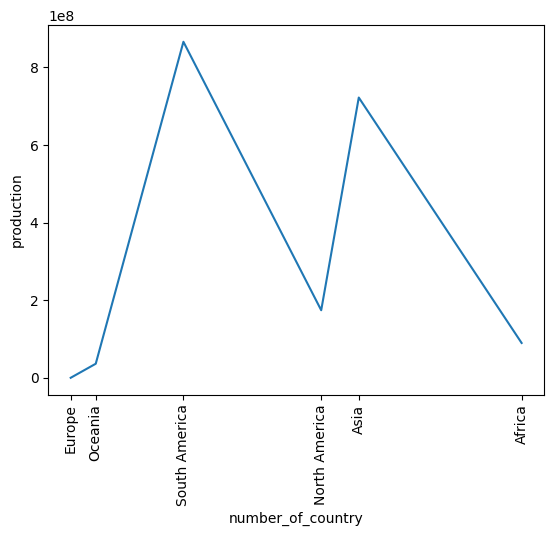

In [63]:
#now just plot a graph between number of countries and producction
sns.lineplot(x='number_of_country',y='production',data=df_continent)
plt.xticks(df_continent['number_of_country'],df_continent.index.to_list(),rotation=90)
plt.show()
#Ans -> no

Do continent with highest land produces more sugar cane?

In [69]:
df_continent['conti_land']=df.groupby('Continent').sum()['acreage']
df_continent

,Country,production,production_per_person,acreage,yield,number_of_country,conti_land
Continent,,,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681472.0,2332636.293,1439089.0,2142107.5,38,1439089.0
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,1857769.303,10608319.0,1171871.4,25,10608319.0
Europe,PortugalSpain,5823.0,536.000,71.0,131870.9,2,71.0
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,3796081.508,1581983.0,1082602.4,22,1581983.0
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,28593.605,490909.0,162419.1,4,490909.0
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,3505531.738,11369236.0,677192.7,11,11369236.0


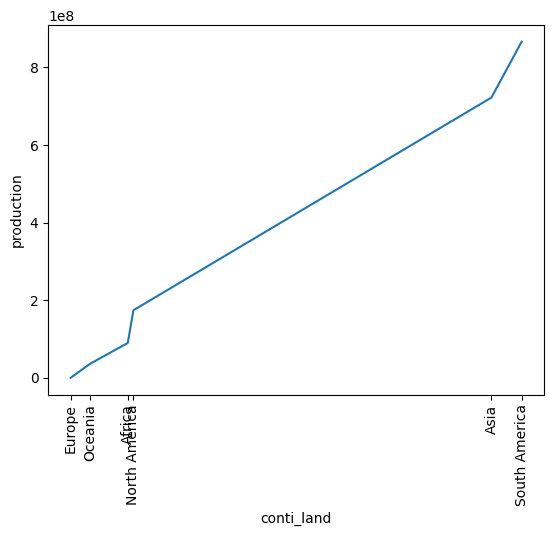

In [70]:
sns.lineplot(x='conti_land',y='production',data=df_continent)
plt.xticks(df_continent['conti_land'],df_continent.index.to_list(),rotation=90)
plt.show()

Correlation for Continent

In [72]:
#can also solve by simple finding the correlation between columns
df_continent.corr(numeric_only=True)

,production,production_per_person,acreage,yield,number_of_country,conti_land
production,1.000000,0.522211,0.994897,0.091201,0.109244,0.994897
production_per_person,0.522211,1.000000,0.463215,0.542961,0.540086,0.463215
acreage,0.994897,0.463215,1.000000,0.111166,0.132817,1.000000
yield,0.091201,0.542961,0.111166,1.000000,0.989712,0.111166
number_of_country,0.109244,0.540086,0.132817,0.989712,1.000000,0.132817
conti_land,0.994897,0.463215,1.000000,0.111166,0.132817,1.000000


Find Production distribution by continent

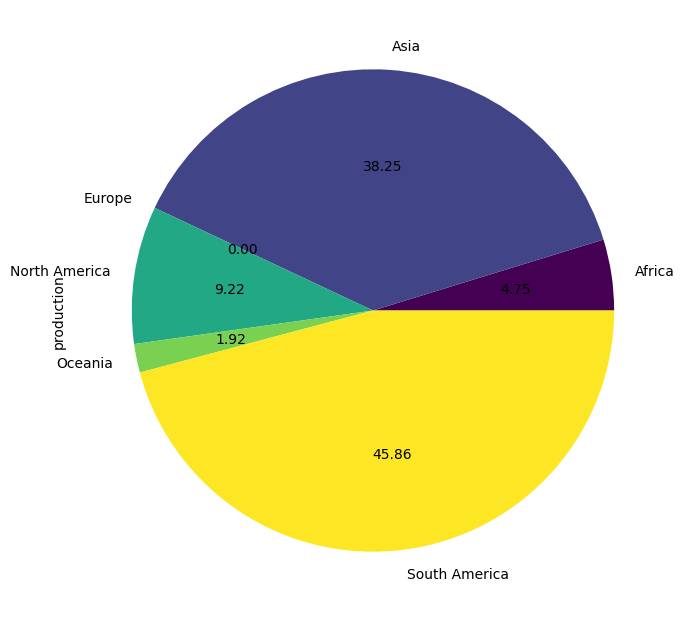

In [79]:
df_continent['production'].plot(kind='pie',autopct='%.2f',cmap='viridis',figsize=(7,7))
plt.tight_layout()
plt.show()